# Rank tests - Previous 15m test data

In [91]:
import scipy.signal as signal
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import os
import seaborn as sns
import re

In [21]:
HOME = os.getenv("HOME")
PATH = os.path.join(HOME,"Documents/MASTER-THESIS/MasterThesisResults/")

# Device 6 Analysis

## Load data

In [22]:
FOLDER = "old_test_data__device_6_analysis/"
FULL_PATH = os.path.join(PATH,"rank_tests",FOLDER)
i = 30
data_results = pd.DataFrame()
FILES = os.listdir(FULL_PATH)
FILES.sort()
for FILE in FILES:
    model_start = re.search("cnn_110_", FILE).end()
    model_end = re.search(".npy", FILE).start()
    MODEL = FILE[model_start:model_end]
    
    device_start = re.search("device-", FILE).end()
    device_end = re.search("-epoch", FILE).start()
    DEVICE = FILE[device_start:device_end]
    
    epoch_start = re.search("epoch-", FILE).end()
    epoch_end = re.search("-keybyte", FILE).start()
    EPOCH = FILE[epoch_start:epoch_end]
    
    #print(FILE)
    FILE_NAME = f"d{DEVICE} e{EPOCH} {MODEL}"
    data_results[FILE_NAME] = np.load(FULL_PATH + FILE, allow_pickle=True)
    i+=5

data_results.describe()

,d10 e100 GWN_0_04_hidden_layer,d6 e100 GWN_0_03,d6 e100 rayleigh_noise_0_0138,d6 e100 rayleigh_noise_0_0276,d6 e40 No_noise,d6 e50 GWN_0_01,d6 e50 GWN_0_02,d6 e50 GWN_0_03,d6 e50 GWN_0_04,d6 e50 GWN_0_04_hidden_layer,d6 e50 GWN_0_05,d6 e50 No_noise,d6 e50 collected_noise_105_scaling,d6 e50 collected_noise_25_scaling,d6 e50 collected_noise_25_scaling_no_mean_adjustment,d6 e50 collected_noise_50_scaling_no_mean_adjustment,d6 e50 collected_noise_75_scaling,d6 e50 rayleigh_noise_0_0138
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,210.010000,364.940000,498.790000,467.100000,773.64000,502.840000,416.520000,363.790000,356.060000,362.590000,470.44000,732.920000,707.19000,564.060000,423.830000,411.510000,500.150000,433.370000
std,23.574295,46.894427,66.945975,63.060257,98.29789,65.034369,49.605612,45.901144,45.169003,43.658013,58.32447,91.623481,88.42239,66.432288,52.209766,54.523926,68.252706,57.716068
min,141.000000,263.000000,338.000000,327.000000,567.00000,357.000000,283.000000,232.000000,234.000000,266.000000,344.00000,507.000000,531.00000,392.000000,292.000000,219.000000,315.000000,291.000000
25%,194.750000,328.000000,451.750000,423.000000,710.50000,458.750000,385.000000,330.250000,325.500000,328.750000,430.25000,665.750000,641.75000,520.000000,388.000000,374.000000,455.750000,393.000000
50%,209.000000,366.000000,498.500000,471.500000,781.50000,500.000000,421.500000,363.000000,351.500000,362.500000,464.00000,724.500000,706.50000,563.500000,422.500000,412.500000,505.500000,424.000000
75%,225.250000,399.250000,547.000000,510.250000,837.25000,551.500000,450.000000,396.500000,389.250000,399.500000,511.25000,796.750000,767.50000,604.000000,449.000000,449.000000,544.000000,467.500000
max,268.000000,474.000000,778.000000,615.000000,988.00000,687.000000,541.000000,474.000000,448.000000,484.000000,595.00000,942.000000,924.00000,774.000000,555.000000,548.000000,641.000000,655.000000


## Histogram plots (No noise, GWN, Collected, Rayleigh)

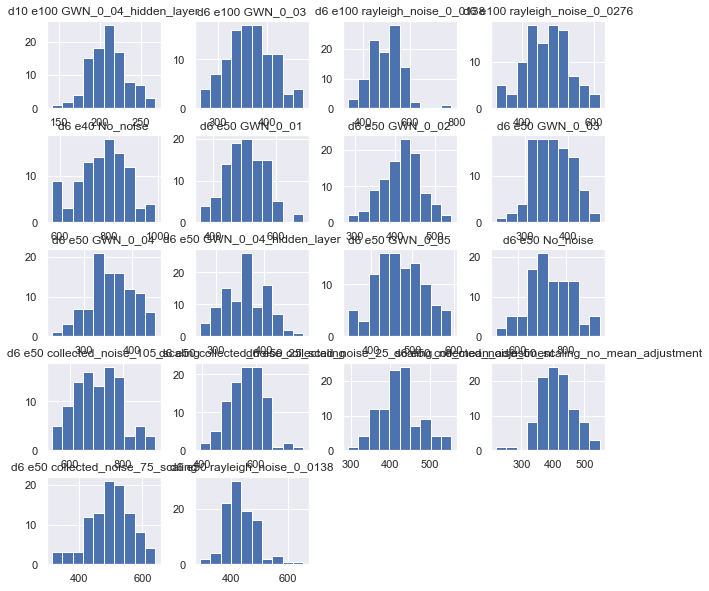

In [23]:
#plt.hist(data_results, bins=1)
data_results.hist(figsize=(10,10))
plt.show()

d10 e100 GWN_0_04_hidden_layer


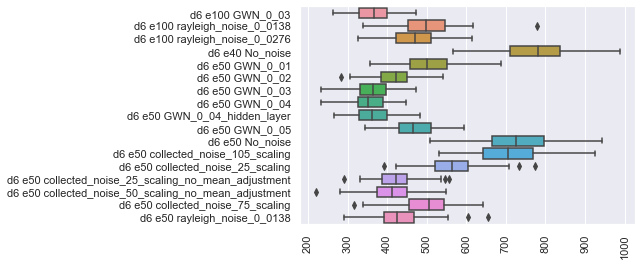

In [24]:
%matplotlib inline
data = data_results.copy()
print(data.columns[0])
data = data.drop(columns="d10 e100 GWN_0_04_hidden_layer")
ax = sns.boxplot(data=data, orient="h")
plt.xticks(rotation=90)
plt.show()

In [25]:
%matplotlib inline
data = data_results.copy()
data = data.drop(columns=["d10 e100 GWN_0_04_hidden_layer", "d6 e50 collected_noise_50_scaling", "d6 e50 rayleigh_noise_0_0276"])
ax = sns.barplot(data=data, orient="h")
plt.xticks(rotation=90)
plt.show()

KeyError: "['d6 e50 collected_noise_50_scaling' 'd6 e50 rayleigh_noise_0_0276'] not found in axis"

# Epoch comparison

## GWN 0.04 Hidden layer - Epochs

In [ ]:
HOME = os.getenv("HOME")
PATH = os.path.join(HOME,"Documents/MASTER-THESIS/MasterThesisResults/")

In [ ]:
FOLDER = "epoch_analysis_GWN_0_04_hidden_layer/"
FULL_PATH = os.path.join(PATH,"rank_tests/",FOLDER)
i = 30
df = pd.DataFrame()
FILES = os.listdir(FULL_PATH)
FILES.sort()
for FILE in FILES:
    #print(FILE)
    df[f"{i}"] = np.load(FULL_PATH + FILE)
    i+=5

df.describe()

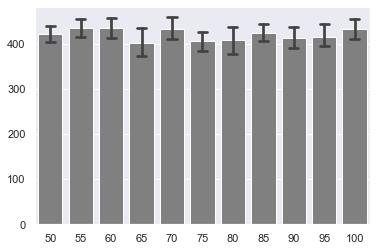

In [26]:
ax = sns.barplot(
    data=df, 
    #palette="Greys", 
    color="grey",
    capsize=0.3,
)

## Raigleigh 0.0138 - Epochs

In [27]:
FOLDER = "epoch_analysis_rayleigh_noise_0138/"
FULL_PATH = os.path.join(PATH,"rank_tests/",FOLDER)
i = 40
df = pd.DataFrame()
FILES = os.listdir(FULL_PATH)
FILES.sort()
for FILE in FILES[1:]:
    #print(FILE)
    df[f"{i}"] = np.load(FULL_PATH + FILE)
    i+=5

df[f"{100}"] = np.load(FULL_PATH + FILES[0])
df.describe()

,40,45,50,55,60,65,70,75,80,85,90,95,100
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,454.950000,432.350000,435.600000,460.300000,448.150000,452.55000,459.300000,477.400000,486.750000,474.700000,449.25000,477.500000,478.300000
std,52.949305,65.018439,57.326764,54.782921,62.566407,67.65351,49.806045,69.131758,63.661006,44.885937,50.64414,67.244644,59.913183
min,355.000000,327.000000,347.000000,368.000000,359.000000,340.00000,355.000000,378.000000,405.000000,402.000000,394.00000,348.000000,359.000000
25%,418.500000,383.750000,389.000000,428.000000,401.250000,391.00000,434.750000,430.500000,426.250000,447.000000,413.00000,442.500000,432.250000
50%,448.500000,436.500000,456.500000,458.500000,438.500000,473.50000,453.000000,475.000000,491.500000,479.000000,433.00000,469.000000,486.000000
75%,494.000000,477.500000,478.500000,492.500000,499.250000,501.75000,490.500000,517.000000,536.500000,496.500000,469.25000,507.750000,510.750000
max,553.000000,543.000000,520.000000,590.000000,564.000000,583.00000,563.000000,654.000000,627.000000,579.000000,583.00000,609.000000,602.000000


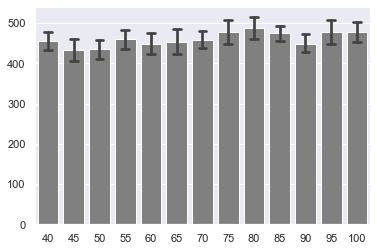

In [28]:
ax = sns.barplot(
    data=df, 
    #palette="Greys", 
    color="grey",
    capsize=0.3,
)

## Collected noise x50 - Epoch

In [29]:
FOLDER = "epoch_analysis_collected_50/"
FULL_PATH = os.path.join(PATH,"rank_tests/",FOLDER)
i = 50
df = pd.DataFrame()
FILES = os.listdir(FULL_PATH)
FILES.sort()
for FILE in FILES[1:]:
    #print(FILE)
    df[f"{i}"] = np.load(FULL_PATH + FILE)
    i+=5

df[f"{100}"] = np.load(FULL_PATH + FILES[0])
df.describe()

,50,55,60,65,70,75,80,85,90,95,100
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,421.500000,435.250000,433.950000,401.600000,431.750000,405.400000,407.600000,424.400000,413.100000,415.450000,432.200000
std,43.543686,48.158592,54.022875,75.394681,57.817203,49.715401,67.932939,47.266768,57.822687,58.732646,50.399039
min,363.000000,330.000000,322.000000,315.000000,353.000000,317.000000,288.000000,335.000000,326.000000,338.000000,342.000000
25%,390.000000,407.000000,411.000000,346.750000,399.250000,382.000000,356.750000,389.000000,367.750000,379.500000,410.750000
50%,414.000000,432.500000,417.000000,377.500000,427.500000,406.500000,408.000000,423.000000,417.000000,404.500000,424.000000
75%,449.000000,469.250000,460.000000,438.000000,448.750000,449.000000,462.750000,454.500000,467.250000,446.750000,462.500000
max,516.000000,514.000000,552.000000,616.000000,602.000000,480.000000,523.000000,510.000000,502.000000,586.000000,545.000000


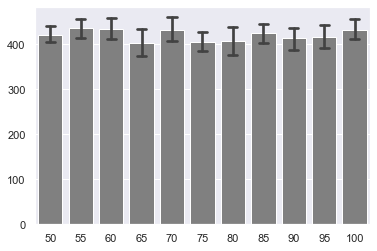

In [30]:
ax = sns.barplot(
    data=df, 
    #palette="Greys", 
    color="grey",
    capsize=0.3,
)

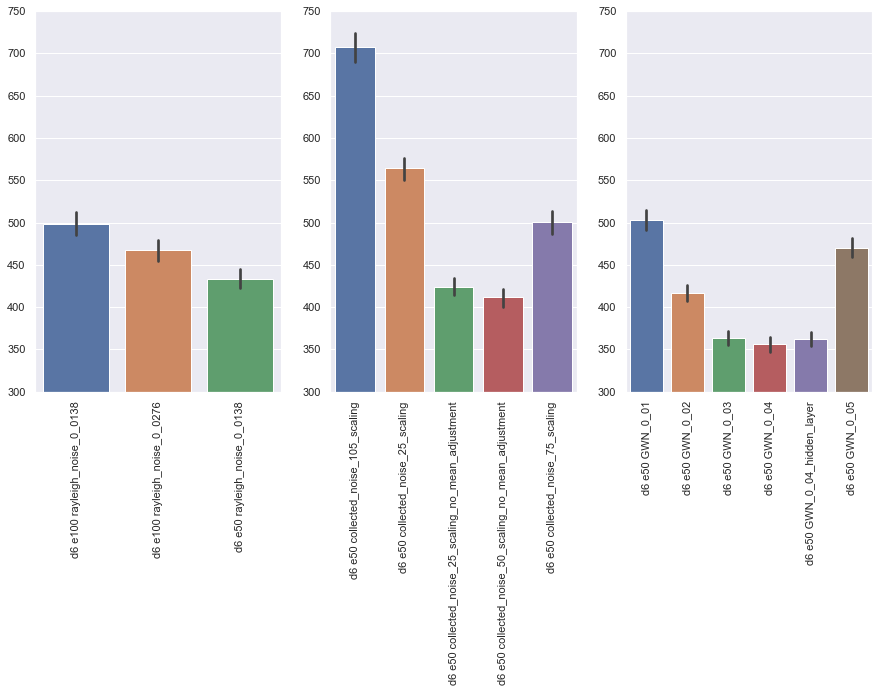

In [31]:
ylim_bottom = 300
ylim_top = 750
sns.set(rc={"figure.figsize":(15, 7)})
plt.subplot(1,3,1)
ax = sns.barplot(data=data_results.loc[:, data_results.columns.str.contains('rayleigh')])
plt.ylim(ylim_bottom,ylim_top)
plt.xticks(rotation=90)
plt.subplot(1,3,2)
ax = sns.barplot(data=data_results.loc[:, data_results.columns.str.contains('collected')])
plt.ylim(ylim_bottom,ylim_top)
plt.xticks(rotation=90)
plt.subplot(1,3,3)
ax = sns.barplot(data=data_results.loc[:, data_results.columns.str.contains('d6 e50 GWN')])
plt.ylim(ylim_bottom,ylim_top)
plt.xticks(rotation=90)
plt.show()

# Additive models vs devices

In [87]:
FOLDER = "analysis_devices_vs_additive_models/"
FULL_PATH = os.path.join(PATH,"rank_tests",FOLDER)
i = 30
device_data = pd.DataFrame()
FILES = os.listdir(FULL_PATH)
FILES.sort()
for FILE in FILES:
    model_start = re.search("cnn_110-", FILE).end()
    model_end = re.search(".npy", FILE).start()
    MODEL = FILE[model_start:model_end]
    
    device_start = re.search("device-", FILE).end()
    device_end = re.search("-epoch", FILE).start()
    DEVICE = FILE[device_start:device_end]
    
    epoch_start = re.search("epoch-", FILE).end()
    epoch_end = re.search("-keybyte", FILE).start()
    EPOCH = FILE[epoch_start:epoch_end]
    
    FILE_NAME = f"d{DEVICE} e{EPOCH} {MODEL}"
    data = np.load(FULL_PATH + FILE, allow_pickle=True)
    device_data[FILE_NAME] = data[:92]
    i+=5
device_data = device_data[sorted(device_data.columns)]
device_data.describe()

,d10 e65 collected_noise_50,d10 e65 gaussian_noise_04,d10 e65 no_noise,d10 e65 rayleigh_noise_0138,d6 e65 collected_noise_50,d6 e65 gaussian_noise_04,d6 e65 no_noise,d6 e65 rayleigh_noise_0138,d7 e65 collected_noise_50,d7 e65 gaussian_noise_04,d7 e65 no_noise,d7 e65 rayleigh_noise_0138,d8 e65 collected_noise_50,d8 e65 gaussian_noise_04,d8 e65 no_noise,d8 e65 rayleigh_noise_0138,d9 e65 collected_noise_50,d9 e65 gaussian_noise_04,d9 e65 no_noise,d9 e65 rayleigh_noise_0138
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,172.304348,150.771739,327.369565,173.978261,404.467391,354.282609,762.500000,463.869565,408.532609,330.076087,656.021739,441.532609,319.315217,320.467391,603.456522,340.576087,468.391304,528.489130,771.402174,544.293478
std,20.865735,18.713046,40.944271,20.780368,47.808329,44.430790,93.304476,59.768274,47.527078,35.597022,78.291506,55.128113,39.091026,40.461745,66.761740,40.410866,54.302360,72.296018,104.376965,63.333157
min,119.000000,113.000000,234.000000,119.000000,283.000000,254.000000,557.000000,343.000000,289.000000,248.000000,473.000000,319.000000,230.000000,224.000000,462.000000,249.000000,332.000000,356.000000,537.000000,394.000000
25%,158.750000,136.750000,298.500000,161.000000,376.250000,325.000000,701.250000,424.000000,377.000000,306.250000,598.750000,412.750000,293.250000,290.000000,559.750000,313.750000,432.750000,479.000000,703.750000,500.500000
50%,172.000000,151.500000,325.500000,173.000000,403.000000,354.000000,758.000000,466.000000,408.500000,328.000000,654.000000,440.000000,318.000000,322.000000,599.000000,339.000000,467.000000,523.000000,777.000000,544.500000
75%,183.500000,164.000000,353.000000,187.250000,440.000000,378.250000,823.500000,503.250000,440.750000,357.250000,714.750000,462.750000,345.000000,346.250000,641.500000,367.750000,497.250000,583.000000,850.500000,584.500000
max,229.000000,189.000000,436.000000,231.000000,498.000000,510.000000,971.000000,594.000000,526.000000,422.000000,837.000000,663.000000,420.000000,440.000000,776.000000,425.000000,629.000000,719.000000,1057.000000,680.000000


In [130]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='r', lw=4)]

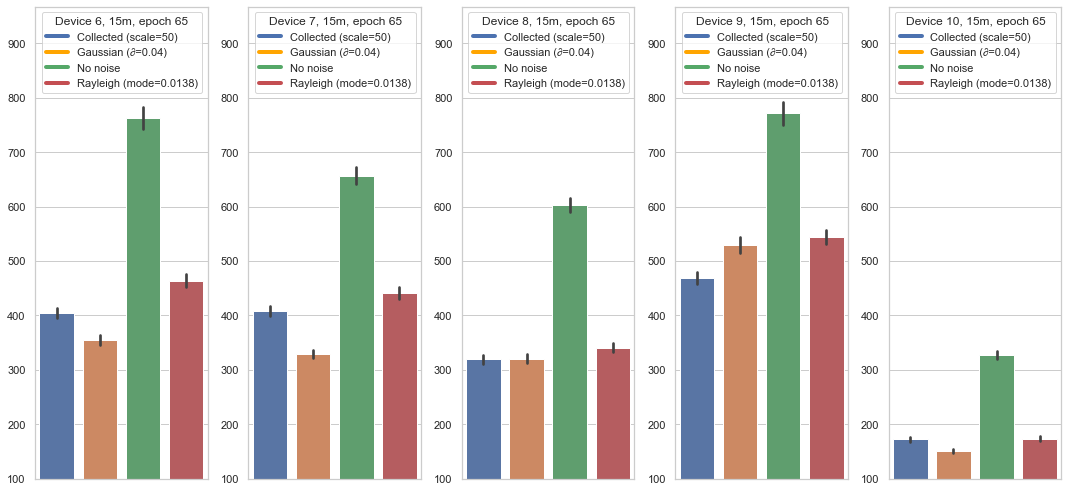

In [152]:
labels = ["Collected (scale=50)", "Gaussian (∂=0.04)", "No noise", "Rayleigh (mode=0.0138)"]
ylim_bottom = 100
ylim_top = 967
sns.set(rc={"figure.figsize":(15, 7)})
sns.set_style("whitegrid")
plt.subplot(1,5,1)
ax = sns.barplot(data=device_data.loc[:, device_data.columns.str.contains('d6')])
#ax.text(0,720,"device 6\nepoch 65\n15m")
ax.legend(custom_lines, labels, title="Device 6, 15m, epoch 65")
#ax.legend(title='Smoker', loc='upper left', labels=['Hell Yeh', 'Nah Bruh', "ff", "rr"])
plt.ylim(ylim_bottom,ylim_top)
plt.xticks([])
#plt.legend(loc="upper left") 
plt.subplot(1,5,2)
ax = sns.barplot(data=device_data.loc[:, device_data.columns.str.contains('d7')])
ax.legend(custom_lines, labels, title="Device 7, 15m, epoch 65")
plt.ylim(ylim_bottom,ylim_top)
plt.xticks([])
plt.subplot(1,5,3)
ax = sns.barplot(data=device_data.loc[:, device_data.columns.str.contains('d8')])
ax.legend(custom_lines, labels, title="Device 8, 15m, epoch 65")
plt.ylim(ylim_bottom,ylim_top)
plt.xticks([])
plt.subplot(1,5,4)
ax = sns.barplot(data=device_data.loc[:, device_data.columns.str.contains('d9')])
ax.legend(custom_lines, labels, title="Device 9, 15m, epoch 65")
plt.ylim(ylim_bottom,ylim_top)
#plt.xticks(rotation=90)
plt.xticks([])
plt.subplot(1,5,5)
ax = sns.barplot(data=device_data.loc[:, device_data.columns.str.contains('d10')])
ax.legend(custom_lines, labels, title="Device 10, 15m, epoch 65")
plt.ylim(ylim_bottom,ylim_top)
plt.xticks([])
plt.tight_layout()
plt.savefig("device_15m_comparison.png")
plt.show()